In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train[0].shape)

60000 train samples
10000 test samples
image shape (28, 28)


label:  9


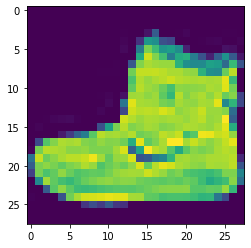

In [3]:
sample = 0
print('label: ', y_train[sample])
image = x_train[sample]

plt.imshow(image)
plt.show()

In [4]:
input_dim = 28 * 28 #784

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
print('input shape: ', x_train.shape[1])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 20
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input shape:  784


In [5]:
model =  keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 20)                10260     
                                                                 
Total params: 674,836
Trainable params: 674,836
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/10
750/750 - 7s - loss: 0.4915 - accuracy: 0.8249 - val_loss: 0.3898 - val_accuracy: 0.8581 - 7s/epoch - 9ms/step
Epoch 2/10
750/750 - 6s - loss: 0.3620 - accuracy: 0.8669 - val_loss: 0.3503 - val_accuracy: 0.8727 - 6s/epoch - 8ms/step
Epoch 3/10
750/750 - 6s - loss: 0.3245 - accuracy: 0.8784 - val_loss: 0.3491 - val_accuracy: 0.8729 - 6s/epoch - 8ms/step
Epoch 4/10
750/750 - 6s - loss: 0.3004 - accuracy: 0.8886 - val_loss: 0.3578 - val_accuracy: 0.8697 - 6s/epoch - 7ms/step
Epoch 5/10
750/750 - 6s - loss: 0.2793 - accuracy: 0.8947 - val_loss: 0.3366 - val_accuracy: 0.8821 - 6s/epoch - 7ms/step
Epoch 6/10
750/750 - 6s - loss: 0.2628 - accuracy: 0.9008 - val_loss: 0.3341 - val_accuracy: 0.8845 - 6s/epoch - 8ms/step
Epoch 7/10
750/750 - 6s - loss: 0.2496 - accuracy: 0.9060 - val_loss: 0.3277 - val_accuracy: 0.8824 - 6s/epoch - 7ms/step
Epoch 8/10
750/750 - 6s - loss: 0.2422 - accuracy: 0.9074 - val_loss: 0.3073 - val_accuracy: 0.8907 - 6s/epoch - 7ms/step
Epoch 9/10
750/750 - 6s 

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

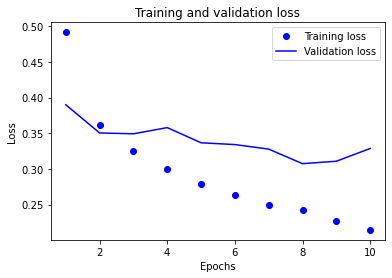

In [8]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.3501432240009308
Test accuracy: 0.8797000050544739


In [11]:
model =  keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(20, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])


history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 20)                10260     
                                                                 
Total params: 674,836
Trainable params: 674,836
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 - 7s - loss: 0.6470 - accurac

In [13]:
model =  keras.Sequential()

model.add(layers.Dense(512, input_shape=(784,)))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization()) 
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(20, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])


history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,                                   
                    validation_split=0.2,
                    verbose = 2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                      